**CS596 - Machine Learning**
<br>
Date: **26 October 2020**


Title: **Lecture 8**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

<h1 align="center">Convolutional Neural Networks (CNN)</h1>

- Convolutional Neural Networks are very similar to ordinary Neural Networks from the previous lecture: 
  - They are made up of neurons that have learnable weights and biases. 
  - Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. 


- The whole network still expresses a single differentiable score function: 
  - From the raw image pixels on one end to class scores at the other. 
  - And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer.
  - The tips/tricks we developed for learning regular Neural Networks still apply.

<h3 align="center">So What Changes?</h3>

- CNN architectures make the explicit assumption that the **inputs are images**, which allows us to encode certain properties into the architecture. 

- These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

<h3 align="center">Image Classification Problem using CIFAR-10</h3>

- For demonstration purposes, we will use the **CIFAR-10 dataset**:

  <a href="https://www.kaggle.com/c/cifar-10">CIFAR-10</a>  is an established computer-vision dataset used for object recognition collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton: 

  It is a **subset** of the **80 million tiny images dataset** and consists of **50,000 32x32 color images** containing one of **10 object classes**, with **5000 images per class**.

  Classes in the dataset, as well as 10 random images from each, are presented below:

  <img src="images/L8_Cifar10.png" width="600" alt="Example" />


<h3 align="center">Why not Rergural Neural Networs?</h3>

- **Recall**: **regular Neural Networks**.

  Neural Networks receive an **input** (a **single vector**), and transform it through a series of **hidden layers**. 
  
  Each **hidden layer** is made up of a set of neurons, where **each neuron** is **fully connected** to all **neurons** in the **previous layer**.
  
  **Neurons** in a **single layer** function completely **independently** and have **no common connections**.
  
  The **last fully-connected layer** is called the **output layer** and in classification settings it represents the **class scores**.


  <br>
  <img src="images/L8_RNN.jpg" width="500" alt="Example" />
  <br>


- **Regular Neural Networks don’t scale well to full images**. 

  For example, in CIFAR-10 dataset, images are only of size $32 \times 32 \times 3$ (**$32$ wide**, **$32$ high**, **$3$ color channels**), so a single fully-connected neuron in a **first hidden layer** of a Regular Neural Network would have $32 \times 32 \times 3 = 3072$ **weights**. 
  
  This amount still seems manageable, but clearly this fully-connected structure does not scale to larger images. 
  
  For example, an **image of more respectable size**, e.g. $200 \times 200 \times 3$, would lead to neurons that have $200 \times 200 \times 3 = 120,000$ **weights**. 
  
  Moreover, we would almost certainly want to have several such neurons, so the **parameters would add up quickly**!
  
  Clearly, this **full connectivity is wasteful** and the **huge number of parameters** would quickly **lead** to **overfitting**.

<h3 align="center">Architecture Overview</h3>

- Convolutional Neural Networks take advantage of the fact that the **input consists of images** and they constrain the architecture in a more sensible way.


- The **Layers** of a CNN have neurons arranged in **3 dimensions**: **width, height, depth**.


<img src="images/L8_CNN3.jpeg" width="500" alt="Example" />



- The **neurons in a layer** will only be **connected** to a **small region** of the **layer before** it, instead of all of the neurons in a fully-connected manner.


- The **final output layer** would for **CIFAR-10** have dimensions $1 \times 1 \times 10$, because by the end of the ConvNet architecture we will reduce the full image into a single vector of class scores, arranged along the depth dimension. 


<img src="images/L8_CNN.jpeg" width="900" alt="Example" />


<h3 align="center">Layers used to build CNNs</h3>

On CIFAR-10 example, we can highlight **several type** of layers to build CNN **architectures**:

- **Input Layer**: 

  Holds the **raw pixel values** of the **image**, in our case an image of $32 \times 32$ and with three **color channels** (**R, G, B**).
  
  
- **Convolutional Layer**: 

  Computes the **output of neurons** that are **connected** to **local regions** in the **previouse layer**.
  
  Uses technique called **convolution** that uses **filters** and may result in volume such as $32 \times 32 \times 12$ if we decided to use $12$ filters.
  
  Performs transformations that are a function of **not only the activations** in the input volume, **but also** of the **parameters**.
  
  **Does most of the computations**!
  

- **RELU Layer**:

  Applies an **elementwise activation function**, such as the $max(0,x)$ thresholding at zero. 
  
  Leaves the size of the volume unchanged: $32 \times 32 \times 12$.
  
  Performs transformations that are a **fixed function** of the activations in the input volume and are **independent of parameters**.
  

- **Pooling Layer**:

  Performs a **downsampling** operation **along the spatial dimensions** (**width**, **height**), resulting in volume such as $16 \times 16 \times 12$.
  
  Performs transformations that are a **fixed function** of the activations in the input volume and are **independent of parameters**.
  

- **Fully-Connected Layer**:

  **Computes the class scores**, resulting in volume of size $1 \times 1 \times 10$, where each of the $10$ **numbers** **correspond** to the **10 categories** of **CIFAR-10**.
  
  As with ordinary Neural Networks and as the name implies, each **neuron in this layer** will be **connected** to **all the numbers** in the **previous volume**.
  
  Performs transformations that are a function of **not only the activations** in the input volume, **but also** of the **parameters**.
  
  
  <img src="images/L8_CNN2.jpeg" width="900" alt="Example" />



<h3 align="center">Convolutional Layer</h3>

- The Conv layer is the core building block of a Convolutional Network that does most of the computational heavy lifting.


- Conv Layers have **filters** which **detect** the **patterns**. 


- Different patterns in an image are **Multiple edges**, **Shapes**, **Textures**, **Objects**, etc:

 
 <img src="images/L8_Patterns.png" width="500" alt="Example" />



- Every **filter** is **small spatially** (along width and height), but **extends through the full depth** of the input volume. 


- For example, a typical filter on a first layer of a ConvNet might have size $5 \times 5 \times 3$, i.e. $5$ pixels **width** and **height**, and $3$ because images have **depth** $3$, the **color channels**. 


- **During the forward pass**, we **slide** (or more precisely, **convolve**) each **filter** **across** the **width** and **height** of the input volume and **compute dot products** between the entries of the filter and the input at any position.


- **Example 1**:

  For example, an **RGB CIFAR-10** image has size $32 \times 32 \times 3$.
  
  If the **filter size** is $5 \times 5$, then each neuron in the Conv Layer will have **total** $5 \times 5 \times 3 = 75$ **weights** (and $+1$ **bias parameter**). 
  
  **Notice** that the **extent of the connectivity along the depth axis must be 3**, since this is the depth of the input volume.


- **Example 2**: 

  Suppose an input volume had size $16 \times 16 \times 20$.
  
  Then using the **filter size** of $3 \times 3$, every neuron in the Conv Layer would now have a total of $3 \times 3 \times 20 = 180$ **connections to the input volume**. 
  
  **Notice** that, again, the **connectivity is local in space** (e.g. $3 \times 3$), but **full along the input depth**, i.e. $20$.

<h3 align="center">Spatial arrangement.</h3>

- **Three hyperparameters** control the size of the output volume: the **depth**, **stride** and **zero-padding**:


1. The **depth** of the **output volume**: 

   It corresponds to the number of filters we would like to use, each learning to look for something different in the input. 
   
   For example, if the first Convolutional Layer takes as input the raw image, then different neurons along the depth dimension may activate in presence of various oriented edges, or blobs of color. 
   
   We will refer to a set of neurons that are all looking at the same region of the input as a depth column (some people also prefer the term fibre).


2. The **stride** with **which** we **slide the filter**. 

   When the **stride is** $1$ then we move the filters **one pixel at a time**.
   
   When the **stride is** $2$ then the filters **jump 2 pixels at a time** as we slide them around. 
   
   **This** will **produce smaller output volumes** spatially.


3. **Zero-padding** is used somemetimes to pad the input volume with zeros around the border. 

   The **size** of this **zero-padding** is a **hyperparameter**. 
   
   The nice feature of zero padding is that it will **allow us** to **control the spatial size** of the **output volumes**.
   
   
- Thus, we can **compute** the **spatial size** of the **output volume** as a function of the **input volume size** ($W$), the **filter size** of the Conv Layer neurons ($F$), the **stride** with which they are applied ($S$), and the amount of **zero padding** used ($P$) on the border:

  $$\frac{W−F+2P}{S+1}.$$
  
  

- For example for a $7 \times 7$ **input** and a $3 \times 3$ **filter** with **stride** $1$ and **pad** $0$ we would get a $5 \times 5$ **output**. 

  With **stride** $2$ we would get a $3 \times 3$ **output**. Lets also see one more graphical example:
  
  
  
- **Note** that the spatial arrangement hyperparameters have mutual constraints. 

  For example, when the **input has size** $W=10$, **no zero-padding** is used $P=0$, and the **filter size** is $F=3$, then it would be **impossible to use stride** $S=2$, since $(W−F+2P)/S+1=(10−3+0)/2+1=4.5$.

<h3 align="center">Real-World Example</h3>

- The **Krizhevsky et al**. architecture that **won** the **ImageNet challenge in 2012** accepted images of size $227 \times 227 \times 3$. 


- On the **first Convolutional Layer**, it used neurons with receptive **field size** $F=11$, **stride** $S=4$ and **no zero padding** $P=0$. 

  Since $(227 - 11)/4 + 1 = 55$, and since the **Conv layer had a depth** of $K=96$, the Conv layer output volume had size $55 \times 55 \times 96$. 
  
- **Each** of the $55 \times 55 \times 96$ **neurons** in this volume **was connected to a region of size** $11 \times 11 \times 3$ in the **input volume**. 
  
  Moreover, **all $96$ neurons** in each depth column are **connected** to the same $11 \times 11 \times 3$ region of the input, but of course with different weights. 
  
  As a fun aside, if you read the actual paper it claims that the input images were $224 \times 224$, which is surely incorrect because $(224 - 11)/4 + 1$ is quite clearly not an integer. 
  
  **This has confused many people** in the history of ConvNets and little is known about what happened. 
  
  One guess is that **Alex** used **zero-padding** of $P=3$ extra pixels that **he does not mention in the paper**.
  
    <img src="images/L8_Filter.jpeg" width="900" alt="Example" />


<h3 align="center">Parameter Sharing</h3>

- Using the **real-world example** above, we see that there are $55 \times 55 \times 96 = 290,400$ neurons in the **first Conv Layer**, and each has $11 \times 11 \times 3 = 363$ **weights** and $1$ **bias**. 

  Together, this **adds up to** $290400 \times 364 = 105,705,600$ **parameters** on the **first layer of the ConvNet alone**.
  
  Clearly, this number is very high.
  
  
- Thus **parameter sharing scheme** is used in Convolutional Layers to **control the number of parameters**.


- It turns out that we can dramatically reduce the number of parameters by making one reasonable assumption: 

  That if **one feature** is **useful** to **compute at some spatial position** $(x,y)$, then it **should also be useful** to **compute** at a **different position** $(x',y')$.
  
  
- **We will discuss this more in details during the Seminar!**

In [21]:
from IPython.display import display

HTML(filename="materials/index.html")

  <img src="images/L8_Filters.png" width="900" alt="Example" />


<h3 align="center">Convolutional Layer Summary</h3>

- Accepts a volume of size $W_1 \times H_1 \times D_1$


- Requires four hyperparameters:
  - Number of **filters** $K$;
  - Their **spatial** extent $F$;
  - The **stride** $S$;
  - The amount of **zero padding** $P$.


- Produces a volume of size $W_2 \times H_2 \times D_2$ where:

  $$W_2=\frac{W_1−F+2P}{S+1},$$
  
  $$H_2=\frac{H_1−F+2P}{S+1},$$
  
  $$D_2=K.$$
  

- With **parameter sharing**, it introduces $F \cdot F \cdot D_1$ **weights per filter**, for a total of $(F \cdot F \cdot D_1) \cdot K$ **weights** and $K$ **biases**.


- A common setting of the hyperparameters is $F=3$, $S=1$, $P=1$. 

  However, there are common conventions and rules of thumb that motivate these hyperparameters.



<h3 align="center">You Remember RELU, Dont You?</h3>

- The ReLU function is another non-linear activation function that has gained popularity in the deep learning domain.
    
- ReLU stands for Rectified Linear Unit. 
    
- The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.




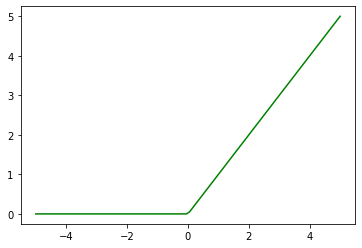

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

#define the function
def relu_function(x):
    if x < 0:
        return 0
    else:
        return x
    
#define the f(x) values
y = [relu_function(i) for i in x]

# plot the function
plt.plot(x,y, 'g')

# setting the axes at the centre
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# show the plot
plt.show()

<h3 align="center">Pooling Layer</h3>

- It is common to periodically insert a **Pooling layer** in-between successive Convolutional layers in a CNN architecture.


- Its function is to **progressively reduce** the **spatial size** of the representation to **reduce** the **amount of parameters** and **computation in the network**, and hence to also **control overfitting**. 


- The **Pooling Layer** **operates independently** on **every depth slice** of the input and **resizes** it spatially, using the **MAX operation**.


- The **Pooling layer**:

  - **Accepts a volume of size** $W_1 \times H_1 \times D_1$

  - Requires **two hyperparameters**:
    
    - Their **spatial** extent $F$;
    - The **stride** $S$.
    
  - **Produces a volume of size** $W_2 \times H_2 \times D_2$ where:

    $$W_2=\frac{PW_1−F}{S+1},$$
    
    $$H_2=\frac{H_1−F}{S+1},$$
    
    $$D_2= D+1$$
    
  - **Introduces zero parameters** since it computes a **fixed function of the input** For **Pooling layers**
  
  - It is **not common** to pad the input using **zero-padding**.
  

  <img src="images/L8_Pooling.jpeg" width="800" alt="Example" />
  
  
  - However, **many people dislike** the pooling operation and think that we can get away without it. 
  
    For example, **to reduce the size** of the representation one can **use larger stride** in CONV layer once in a while. 


<h3 align="center">Fully-Connected Layer</h3>

- Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. 

- Their **activations** can hence be **computed** with a **matrix multiplication** followed by a **bias offset**.


- It's worth to emphesize that the **only difference** between **FC** and **CONV layers** is that the **neurons** in the **CONV layer are connected only to a local region** in the input, and that **many of the neurons** in a **CONV volume share parameters**.


- Therefore, it turns out that it’s **possible** to **convert between FC and CONV layers**:


- For any **CONV layer** there is an **FC layer** that **implements the same forward function**. 
  
  The weight matrix would be a large matrix that is mostly zero except for at certain blocks (due to local connectivity) where the weights in many of the blocks are equal (due to parameter sharing).


- Conversely, any **FC layer can be converted to a CONV layer**. 

  For example, an **FC layer** with $K=4096$ that is looking at some input volume of size $7 \times 7 \times 512$ can be equivalently expressed as a CONV layer with $F=7$, $P=0$, $S=1$, $K=4096$. 
    
  **In other words**, we are **setting the filter size** to **be exactly the size of the input volume**.
  
  Hence the output will simply be $1 \times 1 \times 4096$ since only a single depth column **fits** across the input volume, giving identical result as the initial FC layer.




<h3 align="center">Commonly used CNN Architectures</h3>

There are several architectures in the field of Convolutional Networks that have a name. 


The most common are:
  
- **LeNet**. The first successful applications of Convolutional Networks were developed by Yann LeCun in 1990’s. 

  Of these, the best known is the LeNet architecture that was used to read zip codes, digits, etc.
  
  
- **AlexNet**. The first work that popularized Convolutional Networks in Computer Vision was the AlexNet, developed by Alex Krizhevsky, Ilya Sutskever and Geoff Hinton. 

  The AlexNet was submitted to the ImageNet ILSVRC challenge in 2012 and significantly outperformed the second runner-up (top 5 error of 16% compared to runner-up with 26% error). 
  
    The Network had a very similar architecture to LeNet, but was deeper, bigger, and featured Convolutional Layers stacked on top of each other (previously it was common to only have a single CONV layer always immediately followed by a POOL layer).
  
  
- **ZF Net**. The ILSVRC 2013 winner was a Convolutional Network from Matthew Zeiler and Rob Fergus. 

  It became known as the ZFNet (short for Zeiler & Fergus Net). It was an improvement on AlexNet by tweaking the architecture hyperparameters, in particular by expanding the size of the middle convolutional layers and making the stride and filter size on the first layer smaller.
  
  
- **GoogLeNet**. The ILSVRC 2014 winner was a Convolutional Network from Szegedy et al. from Google. 

  Its main contribution was the development of an Inception Module that dramatically reduced the number of parameters in the network (4M, compared to AlexNet with 60M). 
  
  Additionally, this paper uses Average Pooling instead of Fully Connected layers at the top of the ConvNet, eliminating a large amount of parameters that do not seem to matter much. 
    
  There are also several followup versions to the GoogLeNet, most recently Inception-v4.


- **VGGNet**. The runner-up in ILSVRC 2014 was the network from Karen Simonyan and Andrew Zisserman that became known as the VGGNet. 

  Its main contribution was in showing that the depth of the network is a critical component for good performance. 
  
  Their final best network contains 16 CONV/FC layers and, appealingly, features an extremely homogeneous architecture that only performs 3x3 convolutions and 2x2 pooling from the beginning to the end. 
  
  Their pretrained model is available for plug and play use in Caffe. A downside of the VGGNet is that it is more expensive to evaluate and uses a lot more memory and parameters (140M). 
  
  Most of these parameters are in the first fully connected layer, and it was since found that these FC layers can be removed with no performance downgrade, significantly reducing the number of necessary parameters.


- **ResNet**. Residual Network developed by Kaiming He et al. was the winner of ILSVRC 2015. 

  It features special skip connections and a heavy use of batch normalization. 
  
  The architecture is also missing fully connected layers at the end of the network. 
  
  The reader is also referred to Kaiming’s presentation (video, slides), and some recent experiments that reproduce these networks in Torch. 
  
  ResNets are currently by far state of the art Convolutional Neural Network models and are the default choice for using ConvNets in practice (as of May 10, 2016). 
  
  In particular, also see more recent developments that tweak the original architecture from Kaiming He et al. Identity Mappings in Deep Residual Networks (published March 2016).


<h1 align="center">End of Lecture</h1>